In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Breaking the volume into 3*3*1000 grid
x, y, z = np.meshgrid(np.arange(-1, 2), np.arange(-1, 2), np.arange(1, 1001)) # creating arrays to store the x, y, z coordinates
r = np.stack((x, y, z), axis = -1) # r contains the coordinates of the 3x3x1000 volume
A1 = np.zeros((3, 3, 1000, 3), dtype = 'complex128') # Matrix A can be indexed as (x_location, y_location, z_location)

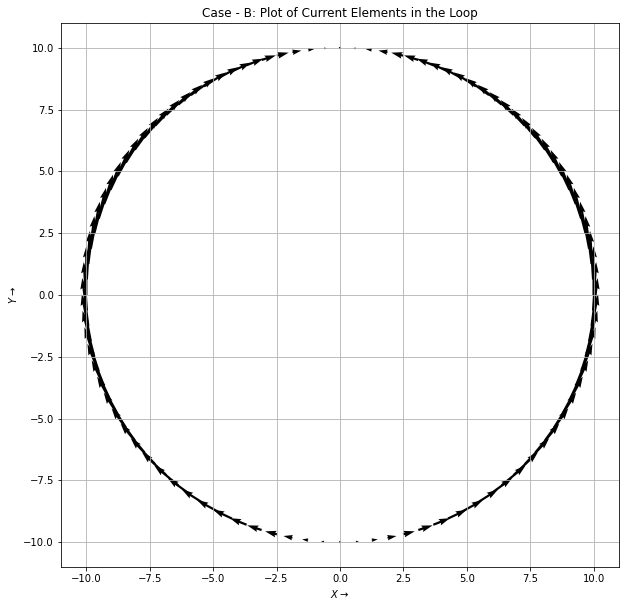

In [3]:
# Plotting current elements

element_angles = np.linspace(0, 2*np.pi, 101)[:-1] # angles of each current element
radius = 10
k=0.1
length = 2*np.pi*radius/100 # length of each element
current_x = -length*np.sin(element_angles)*np.cos(element_angles)*(10**7) # current vector in x direction
current_y = length*np.cos(element_angles)*np.cos(element_angles)*(10**7) # current vector in y direction
x_pos = radius*np.cos(element_angles) # x coordinate of elements
y_pos = radius*np.sin(element_angles) # y coordinate of elements

fig, ax = plt.subplots(figsize = (10,10))
fig = ax.quiver(x_pos, y_pos, current_x, current_y, width = 0.004)
plt.grid(True)
plt.xlabel(r'$X\rightarrow$')
plt.ylabel(r'$Y\rightarrow$')
plt.title(r'Case - B: Plot of Current Elements in the Loop')
plt.savefig('fig1b.png')
plt.show()

In [4]:
# Finding rl' and dl'

rl = np.c_[x_pos, y_pos, np.zeros_like(x_pos)]
dl = np.c_[-length*np.sin(element_angles), length*np.cos(element_angles), np.zeros_like(x_pos)]

In [5]:
def calc(l, rl):
    x, y, z = np.meshgrid(np.arange(-1, 2), np.arange(-1, 2), np.arange(1, 1001)) # creating arrays to store the x, y, z coordinates
    r = np.stack((x, y, z), axis = -1) # r contains the coordinates of the 3x3x1000 volume
    R = np.linalg.norm(r-rl[l], axis = -1) # R contains |rijk-rl| for all i, j, k and is of shape 3x3x1000
    
    return R

In [6]:
def calc_A(l, rl, dl, element_angles):
    R = calc(l, rl)
    A = np.cos(element_angles[l])*np.exp(-1j*k*R)/R
    A = np.stack((A, A, A), axis = -1) # Stacking A thrice so that multiplication with dl is vectorised
    A = A*dl[l]
    
    return A

In [7]:
# Accumulating A for every current element
for l in range(len(element_angles)):
    Al = calc_A(l, rl, dl, element_angles)
    A1 += Al

In [8]:
# Implementing the formula of B in terms of A
B = (A1[2, 1, :, 0] - A1[1, 2, :, 1] - A1[0, 1, :, 0] + A1[1, 0, :, 1])/4

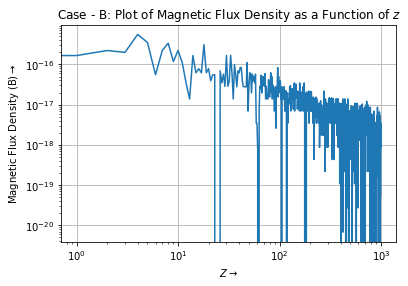

In [9]:
# Plotting B
plt.loglog(np.abs(B))
plt.xlabel(r'$Z\rightarrow$')
plt.ylabel(r'Magnetic Flux Density (B)$\rightarrow$')
plt.title(r'Case - B: Plot of Magnetic Flux Density as a Function of $z$')
plt.grid(True)
plt.savefig('fig2b.png')
plt.show()

In [ ]:
# Fitting Least Squares

def generate_M(z):
    a = np.log(z)
    b = np.ones_like(z)
    M = np.c_[a, b]
    return M

In [ ]:
# Applying Least Squares
b, c = np.linalg.lstsq(generate_M(np.arange(1,1001)), np.log(np.abs(B)), rcond = None)[0]

In [ ]:
c = np.exp(c) # Value of c returned by lstsq is actually ln(c)

In [ ]:
plt.loglog(np.abs(B))
plt.loglog(c*(np.arange(1,1001))**b)
plt.legend(['Actual Magnetic Field', 'Least Squares Estimate'])
plt.xlabel(r'$Z\rightarrow$')
plt.ylabel(r'Magnetic Flux Density (B)$\rightarrow$')
plt.title(r'Plot of Magnetic Flux Density as a Function of $z$')
plt.grid(True)
plt.show()

In [ ]:
b